# <span style='color:blue'> <center>Introduction to Statistical Analysis</center> </span>
## **Chapter 1.** Summary Statistics
#### by **Ivan Alducin**
<p><img src="https://scx2.b-cdn.net/gfx/news/hires/2019/howtoovercom.jpg" width="1500"</p>

## Promedio y Mediana
<p>La tabla <code>food_consumption</code> contiene información sobre los kilogramos de alimentos consumidos por persona y por país en cada categoría de alimentos (<code>consumption</code>), así como información sobre la huella de carbono de esa categoría de alimentos (<code>co2_emissions</code>) medida en kilogramos de dióxido de carbono, por persona por año en cada país.

En este ejercicio, calcularás medidas de centro (<i>mean, median</i>) para comparar el consumo de alimentos en los EE. UU. Y Bélgica</p>

In [38]:
# Importar pandas, numpy y matplotlib.pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Importa el archivo food_consumption.csv
df = pd.read_csv('food_consumption.csv')
# Head te muestra las primeras 5 filas de la base (le puedes poner el número específico a mostrar dentro de los paréntesis)
df.head()

# describe, shape (te da el data frame: #filas, #columnas), info (información en general de la base), sample(muestra aleatoria)
df.info()
df.shape
#Te da todas las variables de estadística descriptiva.
df.describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emission   1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


,consumption,co2_emission
count,1430.000000,1430.000000
mean,28.110406,74.383993
std,49.818044,152.098566
min,0.000000,0.000000
25%,2.365000,5.210000
50%,8.890000,16.530000
75%,28.132500,62.597500
max,430.760000,1712.000000


In [9]:
df.head()

,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96


In [8]:
# Filtrar los datos para Belgica
bel = df[df['country']=='Belgium']

# Filtrar los datos para USA
usa = df[df['country']=='USA']

# Calcula el promedio y la mediana para el consumo en Belgium
print(np.mean(bel['consumption']))
print(np.median(bel['consumption']))

# Calcula el promedio y la mediana para el consumo en USA (con funciones de Panda)
print(usa['consumption'].mean())
print(usa['consumption'].median())

42.132727272727266
12.59
44.650000000000006
14.58


In [12]:
# Filtra los datos de Belgica y USA en un mismo DataFrame (se usa or, no and)
usa_bel = df[(df['country']=='Belgium') | (df['country']=='USA')]

# Agrupa los datos por país y luego calcula la media y la mediana para el consumo (funciones Numpy)
# Se hace lo mismo que la lìnea pasada, pero en un paso.
print(usa_bel.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


<AxesSubplot:>

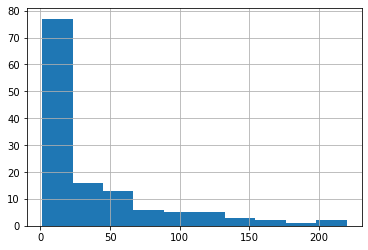

In [14]:
# Filtra los datos únicamente para mostrar todo lo relacionado con Arroz('rice')
rice = df[df['food_category']=='rice']

# Gráfica un histograma de las emisiones de CO2 para el consumo de arroz
# Si no se especifica la columna, va a hacer el histograma para todas las variables numéricas.
rice['co2_emission'].hist()

#Interpretaciòn: variable/distribucion muy sesgada, cargada a la izquierda.
#Hay que quitar las variables atìpicas.

In [15]:
# Calcula la media y la mediana para las emisiones de CO2 en cosumo de arroz, usa .agg()
#Con funciones de Panda.
rice['co2_emission'].agg(['mean', 'median'])

#Cuando hay variables sesgadas, la media y mediana son parecidas.

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64

## Cuantiles
<p>Los cuantiles son una excelente manera de resumir datos numéricos, ya que se pueden usar para visualizar la media y la dispersión, así como para tener una idea de dónde se encuentra un punto de datos en relación con el resto del conjunto de datos. Por ejemplo, lo podemos aplicar a la hora de ofrecer un descuento al 10% de los usuarios más activos en un sitio web.</p>

In [16]:
# Calcula los cuartiles para las emisiones de CO2
#Cuantil 0.5 = Mediana

np.quantile(df['co2_emission'],[0,0.25,0.5,0.75,1])

array([   0.    ,    5.21  ,   16.53  ,   62.5975, 1712.    ])

In [17]:
# Calcula los quintiles para las emisiones de CO2
print(np.quantile(df['co2_emission'],[0,0.2,0.4,0.6,0.8,1]))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [26]:
# Calcula los deciles para las emisiones de CO2
#Para no escribir todos los deciles, se usa:
print(np.linspace(0, 1, 11))
np.quantile(df['co2_emission'],[np.linspace(0, 1, 11)])

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


array([[0.00000e+00, 6.68000e-01, 3.54000e+00, 7.04000e+00, 1.10260e+01,
        1.65300e+01, 2.55900e+01, 4.42710e+01, 9.99780e+01, 2.03629e+02,
        1.71200e+03]])

## Varianza y Desviación Estandar
<p>La varianza y la desviación estándar son dos de las formas más comunes de medir la dispersión de una variable, La cual es importante ya que puede ayudar a definir las expectativas. Por ejemplo, si un vendedor vende una media de 20 productos al día, pero tiene una desviación estándar de 15 productos, probablemente habrá días en los que venda 40 productos, pero también días en los que solo venda uno o dos. Información como esta es importante, especialmente al hacer predicciones.</p>

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


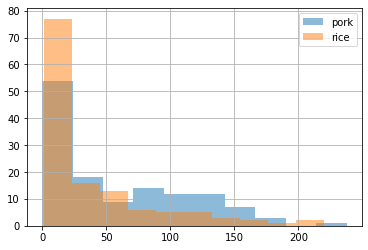

In [32]:
# Calcular la varianza y la desviación estandar de las emisiones de CO2 por cada categría de comida
print(df.groupby('food_category')['co2_emission'].agg([np.var,np.std]))

# Crea dos histogramas para visualizar las emisiones de CO2 para las categorías de Carne de puerco('pork') y Arroz('rice')
df[df['food_category']=='pork']['co2_emission'].hist(alpha=0.5, label='pork')
df[df['food_category']=='rice']['co2_emission'].hist(alpha=0.5, label='rice')
# Visualiza los histogramas
#El alpha aclara el color de las gràficas, y label para el nombre.
plt.legend()
plt.show()

## Outliers
<p>Los valores atípicos pueden tener grandes efectos en estadísticas como la media, la varianza y la desviación estándar. El rango intercuartílico, o IQR, es otra forma de medir la dispersión y la cual está menos influenciada por valores atípicos. también se usa a menudo para encontrar valores atípicos. Si un valor es menor que <code>Q1 - 1.5 X IQR</code> o mayor que <code>Q3 + 1.5 X IQR</code>, se considera un valor atípico. De hecho, así es como se calculan las longitudes de los bigotes en un diagrama de caja de matplotlib.</p>
<p><img src="https://assets.datacamp.com/production/repositories/5758/datasets/ca7e6e1832be7ec1842f62891815a9b0488efa83/Screen%20Shot%202020-04-28%20at%2010.04.54%20AM.png" width="500"/></p>

In [34]:
# Calcula el total de emisiones de CO2 por país
emissions_by_country = df.groupby('country')['co2_emission'].sum()
#Total de emisiones (suma)
emissions_by_country

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64

In [35]:
# Caclula el cuartil 1 y 3 y después el IQR (siendo este la diferencia de los dos anteriores)
q1 = np.quantile(emissions_by_country,0.25)
q3 = np.quantile(emissions_by_country,0.75)
iqr =q3-q1

In [36]:
# Calcula los límites superiores e inferiores de los valores atípicos
#Se estàn definiendo los lìmites para los valores que están fuera de los cuantiles 1 y 3.
lower= q1-1.5*iqr
upper= q3+1.5*iqr

In [39]:
# Filtra los países con emisiones en CO2 atípicas
# emissions_by_country tiene la info exacta que se queria (por eso no se especifica con corchetes).
outliers = emissions_by_country[(emissions_by_country<lower)|(emissions_by_country > upper)]
outliers
# | = Ctrl+Alt+1

country
Argentina    2172.4
Name: co2_emission, dtype: float64